# IR&DM: Assignment 2
## Orazaly Merey, BD-2006

### Deadline: December 26 (until 23:59)

### Text similarity and Agglomerative Document Clustering
**Learning outcomes:**
1. Read texts from file and splitting them to the words.
2. Transform texts into vector spaces, calculate distances in these spaces.
3. Bag of words and TF/IDF vectorizer.

### Data preparation

In [1]:
#Import the libraries
import numpy as np
import pandas as pd

### Task 1.
Please download text file. There we have 22 sentence related to the «cat» topic. 
- Cat (animal)
- UNIX-utility cat for to display the contents of files
- versions of the OS X operating system named after the feline family
Your task is to find two sentences that are closest in meaning to the first sentence in document («In comparison to dogs, cats have not undergone .......») We will use the cosine distance as a measure of proximity.

#### Step 1. Open the file

In [2]:
with open('words.txt') as f:
    file = f.readlines()
file

['In comparison to dogs, cats have not undergone major changes during the domestication process.\n',
 'As cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.\n',
 'A common interactive use of cat for a single file is to output the content of a file to standard output.\n',
 'Cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.\n',
 'In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.\n',
 'The domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.\n',
 'Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).\n',
 'However, if the output is piped or redirected, cat is unnecessary.\n',
 'cat with one named file is safer whe

#### Step 2. Each line is the one sentence. Please make them all in lower case form using string function lower()

In [3]:
lines = list(file)
sentences = []
for line in lines:
    line = line.strip().lower()
    sentences.append(line)
sentences

['in comparison to dogs, cats have not undergone major changes during the domestication process.',
 'as cat simply catenates streams of bytes, it can be also used to concatenate binary files, where it will just concatenate sequence of bytes.',
 'a common interactive use of cat for a single file is to output the content of a file to standard output.',
 'cats can hear sounds too faint or too high in frequency for human ears, such as those made by mice and other small animals.',
 'in one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.',
 'the domesticated cat and its closest wild ancestor are both diploid organisms that possess 38 chromosomes and roughly 20,000 genes.',
 'domestic cats are similar in size to the other members of the genus felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).',
 'however, if the output is piped or redirected, cat is unnecessary.',
 'cat with one named file is safer where human error i

#### Step 3. Tokenization. Means that splitting the sentences to the words. 

In [4]:
import re

for i in range(len(sentences)):
    sentences[i] = re.split('[^a-z]', sentences[i])
    for j in range(sentences[i].count('')):
        sentences[i].remove('')
sentences

[['in',
  'comparison',
  'to',
  'dogs',
  'cats',
  'have',
  'not',
  'undergone',
  'major',
  'changes',
  'during',
  'the',
  'domestication',
  'process'],
 ['as',
  'cat',
  'simply',
  'catenates',
  'streams',
  'of',
  'bytes',
  'it',
  'can',
  'be',
  'also',
  'used',
  'to',
  'concatenate',
  'binary',
  'files',
  'where',
  'it',
  'will',
  'just',
  'concatenate',
  'sequence',
  'of',
  'bytes'],
 ['a',
  'common',
  'interactive',
  'use',
  'of',
  'cat',
  'for',
  'a',
  'single',
  'file',
  'is',
  'to',
  'output',
  'the',
  'content',
  'of',
  'a',
  'file',
  'to',
  'standard',
  'output'],
 ['cats',
  'can',
  'hear',
  'sounds',
  'too',
  'faint',
  'or',
  'too',
  'high',
  'in',
  'frequency',
  'for',
  'human',
  'ears',
  'such',
  'as',
  'those',
  'made',
  'by',
  'mice',
  'and',
  'other',
  'small',
  'animals'],
 ['in',
  'one',
  'people',
  'deliberately',
  'tamed',
  'cats',
  'in',
  'a',
  'process',
  'of',
  'artificial',
  's

#### Step 4. Make a list of all the words that appear in the sentences. 

In [5]:
list_words = {}
index = 0
for words in sentences:
    for word in words:
        if word not in list_words:
            list_words[word] = index
            index += 1
list_words

{'in': 0,
 'comparison': 1,
 'to': 2,
 'dogs': 3,
 'cats': 4,
 'have': 5,
 'not': 6,
 'undergone': 7,
 'major': 8,
 'changes': 9,
 'during': 10,
 'the': 11,
 'domestication': 12,
 'process': 13,
 'as': 14,
 'cat': 15,
 'simply': 16,
 'catenates': 17,
 'streams': 18,
 'of': 19,
 'bytes': 20,
 'it': 21,
 'can': 22,
 'be': 23,
 'also': 24,
 'used': 25,
 'concatenate': 26,
 'binary': 27,
 'files': 28,
 'where': 29,
 'will': 30,
 'just': 31,
 'sequence': 32,
 'a': 33,
 'common': 34,
 'interactive': 35,
 'use': 36,
 'for': 37,
 'single': 38,
 'file': 39,
 'is': 40,
 'output': 41,
 'content': 42,
 'standard': 43,
 'hear': 44,
 'sounds': 45,
 'too': 46,
 'faint': 47,
 'or': 48,
 'high': 49,
 'frequency': 50,
 'human': 51,
 'ears': 52,
 'such': 53,
 'those': 54,
 'made': 55,
 'by': 56,
 'mice': 57,
 'and': 58,
 'other': 59,
 'small': 60,
 'animals': 61,
 'one': 62,
 'people': 63,
 'deliberately': 64,
 'tamed': 65,
 'artificial': 66,
 'selection': 67,
 'they': 68,
 'were': 69,
 'useful': 70,
 'p

#### Step 5. Create Matrix with N x D dimensions (N - the number of the sentences, D - the number of the unique words).
**Fill it in: the element with index (i, j) in this matrix must be equal to the number of occurrences of the j-th word in the i-th sentence. (bag of words)**

In [6]:
#Preparation for step 5
num_of_sentences = len(sentences)
print("Number of sentences: ", num_of_sentences)

num_of_words = len(list_words)
print("Number of words: ", num_of_words)

Number of sentences:  22
Number of words:  254


In [7]:
#Matrix
matrix = np.zeros((num_of_sentences, num_of_words))
for i in range(num_of_sentences):
    for word in sentences[i]:
        matrix[i][list_words[word]] += 1
matrix

array([[1., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 2., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 1., 1.]])

In [8]:
#Bag of words
df = pd.DataFrame(matrix, index = range(num_of_sentences), columns = range(num_of_words))
df.set_axis(list_words, axis = 1, inplace = True)
df['Sentences'] = lines
df.head(3)

,in,comparison,to,dogs,cats,have,not,undergone,major,changes,...,run,off,external,drive,fifth,update,features,more,count,Sentences
0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"In comparison to dogs, cats have not undergone..."
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"As cat simply catenates streams of bytes, it c..."
2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,A common interactive use of cat for a single f...


#### Step 6. Find the cosine distance from first sentence to the all other sentences. Which two sentences is close to the first sentence?

In [9]:
#Cosine distance
from scipy.spatial.distance import cosine

first_sent = matrix[0]
distances = [-1] #extract first sentence
for i in range(1, matrix.shape[0]):
    distances.append(1 - cosine(first_sent, matrix[i]))

In [10]:
#Sentences
distances2 = distances[:]
distances2 = sorted(distances2, reverse = True) 
print("Indexes of sentences similar to the 1st one:", distances.index(distances2[1]), "and", distances.index(distances2[0]), '\n')
print("Sentence 1:\n", lines[distances.index(distances2[1])])
print("Sentence 2:\n", lines[distances.index(distances2[0])])

Indexes of sentences similar to the 1st one: 4 and 6 

Sentence 1:
 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

Sentence 2:
 Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb).



#### Findings:
As we can see from result, it turns out, that the most similar sentences to the first one are the sentences with index 4 and 6:

4. "In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin."

6. "Domestic cats are similar in size to the other members of the genus Felis, typically weighing between 4 and 5 kg (8.8 and 11.0 lb)."

### Task 2.
For the second Task please do the same step from Task 1 (steps 1- 4).
In this task you will create Term Frequency — Inverse Document Frequency matrix. Find the cosine distance from first sentence to the all other sentences. Which two sentences is close to the first sentence. You can use scipy.spatial.distance.cosine. Is the any difference from the result of the previous Task? Note: You should not to use any existing libraries for tdf/idf. All the steps similar to the previous example.

#### Steps 1-4

In [11]:
with open('words.txt') as f:
    file = f.readlines()

sentence_words = {}
for line in lines:
    line = line.lower().strip()
    line = re.split('[^a-z]', line)
    line = [i for i in line if i]
    for word in line:
        sentence_words[word] = sentence_words.get(word, 0) + 1

#### Step 5. Create Term Frequency — Inverse Document Frequency matrix. 

In [12]:
tf_idf = np.zeros((num_of_sentences, num_of_words))
for i in range(0, num_of_sentences):
    for word in sentences[i]:
        tf_idf[i][list_words[word]] =  sentences[i].count(word) * np.log(num_of_sentences / sentence_words[word])
tf_idf

array([[0.69314718, 3.09104245, 0.45198512, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45198512, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.90397025, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.69314718, 0.        , 0.45198512, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.45198512, ..., 3.09104245, 3.09104245,
        3.09104245]])

#### Step 6. Find the cosine distance from first sentence to the all other sentences. Which two sentences is close to the first sentence?

In [13]:
#Cosine distance
from scipy.spatial.distance import cosine

first_sent = matrix[0]
distances = [-1] #extract first sentence
for i in range(1, matrix.shape[0]):
    distances.append(1 - cosine(first_sent, tf_idf[i]))

In [14]:
#Sentences
distances2 = distances[:]
distances2 = sorted(distances2, reverse = True) 
print("Indexes of sentences similar to the 1st one:", distances.index(distances2[0]), "and", distances.index(distances2[1]), '\n')
print("Sentence 1:\n", lines[distances.index(distances2[0])])
print("Sentence 2:\n", lines[distances.index(distances2[1])])

Indexes of sentences similar to the 1st one: 4 and 14 

Sentence 1:
 In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin.

Sentence 2:
 According to Apple, Leopard contains over 300 changes and enhancements over its predecessor, Mac OS X Tiger.



#### Findings:
As we can see from result, it turns out, that the most similar sentences to the first one are the sentences with index 4 and 14:

4. "In one, people deliberately tamed cats in a process of artificial selection, as they were useful predators of vermin."

14. "According to Apple, Leopard contains over 300 changes and enhancements over its predecessor, Mac OS X Tiger."

TF-IDF is a measure that evaluates how relevant a word is to a document in a collection of documents. So, words that are common in every document, such as prepositions, rank low even though they may appear many times, since they don’t mean much to that document in particular. If the word is very common and appears in many documents, this number will approach 0. 

### Task 3.
**Please run the Hierarchy Clustering algorithm for the Task 1 and Task 2. And plot the dendrogram. Please explain your results. NOTE: by default scipy.cluster.hierarchy it uses euclidean distance. You should change it to the cosine distance.**

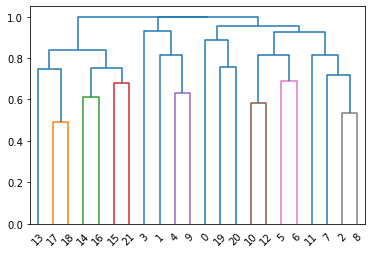

In [15]:
#Dendrogram for Task 1
import scipy.cluster.hierarchy as model
dend_max = model.dendrogram(model.linkage(matrix, method="complete", metric="cosine"))

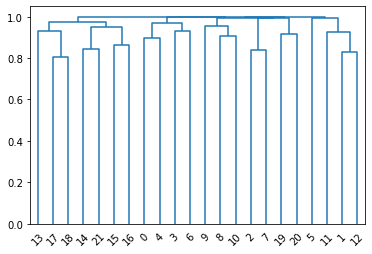

In [16]:
#Dendrogram for Task 2
dend_max = model.dendrogram(model.linkage(tf_idf, method="complete", metric="cosine"))